# **Exercise: DNN - Boston Data**

Conduct the DNN analysis using the boston dataset. You are required to improve the performance of the model using different architecture.

In [1]:
from keras.datasets import boston_housing

#Loading data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [2]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (404, 13)
y_train shape (404,)
X_test shape (102, 13)
y_test shape (102,)


In [3]:
import numpy as np
# Check for missing values in X training set
print(np.isnan(X_train).sum())
# Check for missing values in y training set
print(np.isnan(y_train).sum())

# Check for missing values in X test set
print(np.isnan(X_test).sum())
# Check for missing values in y test set
print(np.isnan(y_test).sum())

0
0
0
0


In [4]:
#Normalization is required as cross diferent features, there are different units, preferably to standardize it. 
#Neural network can do normalisation such as SGD model, but can choose not to normalise for other models
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) #fit transform on train  (to get mean and stadard deviation)
X_test = scaler.transform(X_test) #only transform on test (to use info from train)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout #Dense = linear equation (NN uses linear equation)
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [ ]:
#Building the base model
L1 = 50
L2 = 50
L3 = 50

model = Sequential()
model.add(Dense(L1, input_dim = 13, activation = 'relu')) #input_dim is the total of input variable
model.add(Dense(L2, activation = 'relu'))
model.add(Dense(L3, activation = 'relu'))


#output layer
model.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

In [ ]:
#Compile the sequential model
model.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

In [ ]:
#Training the model
history = model.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 6s 29ms/step - loss: 564.3577 - mae: 21.8689 - val_loss: 551.8088 - val_mae: 21.5921
Epoch 2/200
9/9 [==============================] - 0s 10ms/step - loss: 484.7169 - mae: 19.9768 - val_loss: 454.8477 - val_mae: 19.2235
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 378.9224 - mae: 17.1825 - val_loss: 329.2309 - val_mae: 15.9147
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 252.0823 - mae: 13.5043 - val_loss: 199.3940 - val_mae: 12.0697
Epoch 5/200
9/9 [==============================] - 0s 9ms/step - loss: 141.3452 - mae: 9.5960 - val_loss: 107.2365 - val_mae: 8.5714
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 77.7929 - mae: 6.7533 - val_loss: 70.6822 - val_mae: 6.6805
Epoch 7/200
9/9 [==============================] - 0s 10ms/step - loss: 53.6377 - mae: 5.4362 - val_loss: 53.5731 - val_mae: 5.7226
Epoch 8/200
9/9 [==============================] - 0s 7ms/step

<Figure size 640x480 with 0 Axes>

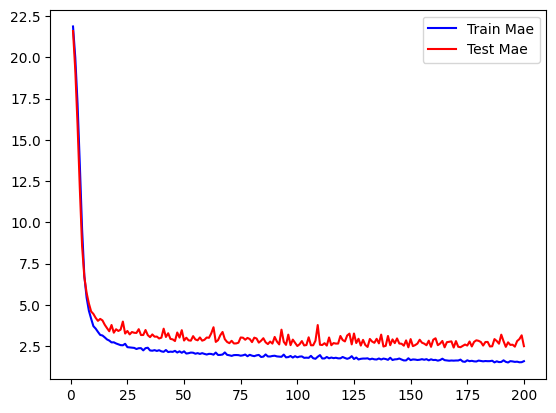

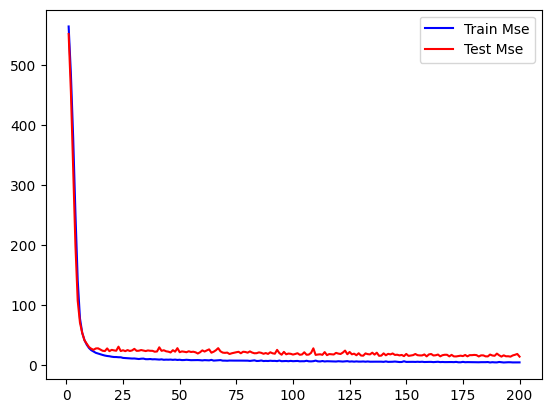

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualisation of Base model
import pandas as pd
import matplotlib.pyplot as plt
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(mae)+1)

plt.plot(epochs , mae,'b', label = 'Train Mae')
plt.plot (epochs, val_mae, 'r', label = 'Test Mae')
plt.legend()
plt.figure()

plt.plot(epochs , loss,'b', label = 'Train Mse')
plt.plot (epochs, val_loss, 'r', label = 'Test Mse')
plt.legend()
plt.figure()

# **Overfitting issue noted.**

In [ ]:
#Create Model with Regularization (Lasso)
L1 = 50
L2 = 50
L3 = 50

model2 = Sequential()
model2.add(Dense(L1, input_dim = 13, activation = 'relu',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l1(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model2.add(Dense(L2, activation = 'relu'))
model2.add(Dense(L3, activation = 'relu'))


#output layer
model2.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model2.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Training the model
history2 = model2.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 1s 25ms/step - loss: 502.0698 - mae: 20.3710 - val_loss: 446.0970 - val_mae: 18.9792
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 372.7252 - mae: 17.0098 - val_loss: 315.0096 - val_mae: 15.3418
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 248.8830 - mae: 13.1401 - val_loss: 204.6347 - val_mae: 11.8926
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 161.6838 - mae: 9.9871 - val_loss: 134.8203 - val_mae: 9.3141
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 112.6217 - mae: 8.1539 - val_loss: 104.5878 - val_mae: 8.0271
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 87.4134 - mae: 7.1467 - val_loss: 86.1646 - val_mae: 7.2792
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 68.8707 - mae: 6.3283 - val_loss: 69.1153 - val_mae: 6.3756
Epoch 8/200
9/9 [==============================] - 0s 9ms/step - l

<Figure size 640x480 with 0 Axes>

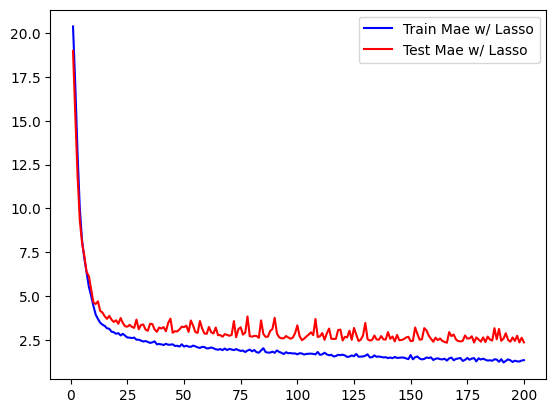

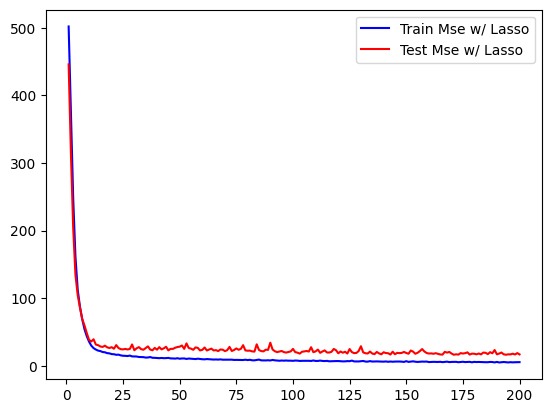

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualisation of Regularization model
mae2 = history2.history['mae']
val_mae2 = history2.history['val_mae']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1,len(mae2)+1)

plt.plot(epochs , mae2,'b', label = 'Train Mae w/ Lasso')
plt.plot (epochs, val_mae2, 'r', label = 'Test Mae w/ Lasso')
plt.legend()
plt.figure()

plt.plot(epochs , loss2,'b', label = 'Train Mse w/ Lasso')
plt.plot (epochs, val_loss2, 'r', label = 'Test Mse w/ Lasso')
plt.legend()
plt.figure()

In [ ]:
#Create Model with Regularization (Ridge)
L1 = 50
L2 = 50
L3 = 50

model3 = Sequential()
model3.add(Dense(L1, input_dim = 13, activation = 'relu',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l2(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model3.add(Dense(L2, activation = 'relu'))
model3.add(Dense(L3, activation = 'relu'))


#output layer
model3.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model3.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Training the model
history3 = model3.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 1s 23ms/step - loss: 545.7871 - mae: 21.4251 - val_loss: 499.1206 - val_mae: 20.4697
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 423.3410 - mae: 18.5524 - val_loss: 359.9173 - val_mae: 16.9426
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 284.5756 - mae: 14.7837 - val_loss: 215.6279 - val_mae: 12.6456
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 167.3223 - mae: 10.5788 - val_loss: 134.5935 - val_mae: 9.8576
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 110.8469 - mae: 8.1833 - val_loss: 89.5719 - val_mae: 7.6083
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 79.7776 - mae: 6.6762 - val_loss: 71.7806 - val_mae: 6.5879
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 65.0112 - mae: 5.9642 - val_loss: 57.4077 - val_mae: 5.9203
Epoch 8/200
9/9 [==============================] - 0s 7ms/step - l

<Figure size 640x480 with 0 Axes>

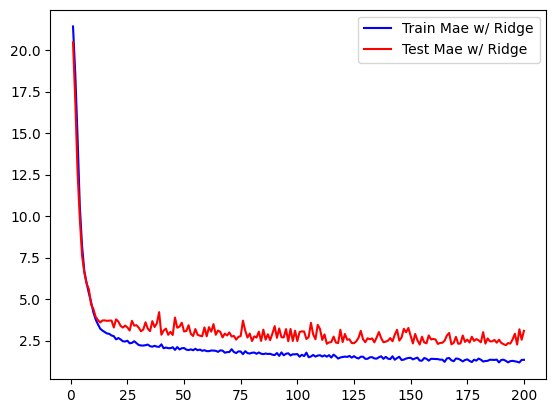

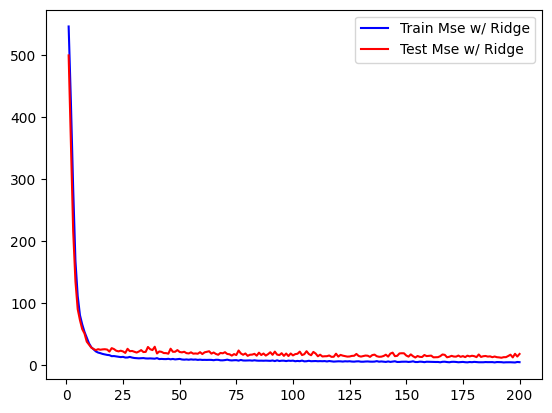

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualisation of Regularization model
mae3 = history3.history['mae']
val_mae3 = history3.history['val_mae']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1,len(mae3)+1)

plt.plot(epochs , mae3,'b', label = 'Train Mae w/ Ridge')
plt.plot (epochs, val_mae3, 'r', label = 'Test Mae w/ Ridge')
plt.legend()
plt.figure()

plt.plot(epochs , loss3,'b', label = 'Train Mse w/ Ridge')
plt.plot (epochs, val_loss3, 'r', label = 'Test Mse w/ Ridge')
plt.legend()
plt.figure()

# **Comment: LASSO Regularization has not shown any improvement on the performance compared to base model. But RIDGE Regularization shown slight improvement. Hence, will proceed to develop the model using RIDGE model.**

In [ ]:
#Create Model with Regularization (Ridge) with dropout
L1 = 50
L2 = 50
L3 = 50

model4 = Sequential()
model4.add(Dense(L1, input_dim = 13, activation = 'relu',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l2(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model4.add(Dense(L2, activation = 'relu'))
model4.add(Dense(L3, activation = 'relu'))
model4.add(Dropout(rate=0.2))

#output layer
model4.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model4.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Training the model
history4 = model4.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 3s 49ms/step - loss: 542.9581 - mae: 21.4600 - val_loss: 505.5782 - val_mae: 20.6072
Epoch 2/200
9/9 [==============================] - 0s 16ms/step - loss: 437.5737 - mae: 18.8535 - val_loss: 394.5007 - val_mae: 17.6893
Epoch 3/200
9/9 [==============================] - 0s 11ms/step - loss: 325.9006 - mae: 15.6355 - val_loss: 261.1436 - val_mae: 13.9969
Epoch 4/200
9/9 [==============================] - 0s 12ms/step - loss: 209.1324 - mae: 11.9644 - val_loss: 156.9601 - val_mae: 10.6368
Epoch 5/200
9/9 [==============================] - 0s 19ms/step - loss: 130.8512 - mae: 9.0685 - val_loss: 103.7702 - val_mae: 8.3886
Epoch 6/200
9/9 [==============================] - 0s 12ms/step - loss: 96.9966 - mae: 7.6356 - val_loss: 75.3027 - val_mae: 6.7950
Epoch 7/200
9/9 [==============================] - 0s 16ms/step - loss: 79.2793 - mae: 6.9851 - val_loss: 61.6899 - val_mae: 6.1649
Epoch 8/200
9/9 [==============================] - 0s 12ms

<Figure size 640x480 with 0 Axes>

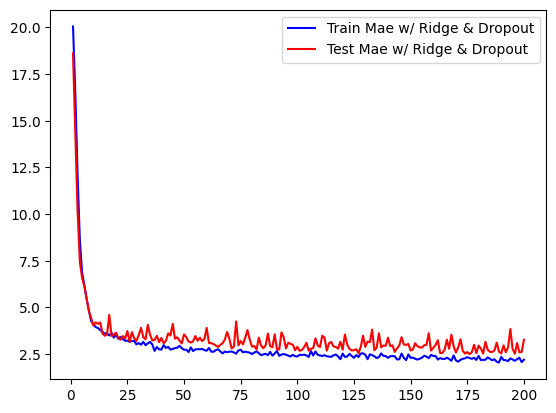

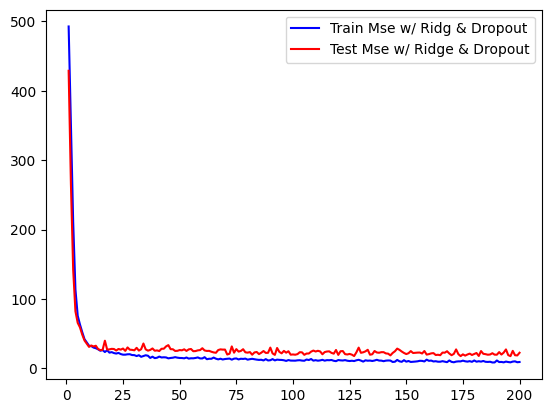

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualisation of L2 Regularization & Dropout model
mae4 = history4.history['mae']
val_mae4 = history4.history['val_mae']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(1,len(mae4)+1)

plt.plot(epochs , mae4,'b', label = 'Train Mae w/ Ridge & Dropout')
plt.plot (epochs, val_mae4, 'r', label = 'Test Mae w/ Ridge & Dropout')
plt.legend()
plt.figure()

plt.plot(epochs , loss4,'b', label = 'Train Mse w/ Ridg & Dropout')
plt.plot (epochs, val_loss4, 'r', label = 'Test Mse w/ Ridge & Dropout')
plt.legend()
plt.figure()

# **Comment: Dropout has worsen the performance of the model, however it has closed the gap between training loss and testing loss caused by overfitting.**

# **Also noted that the loss has been fluctuating, will include early stopping in the next model.**

In [ ]:
from keras.callbacks import EarlyStopping

#Create Model with Regularization (Ridge) with dropout & early stopping
L1 = 50
L2 = 50
L3 = 50

model5 = Sequential()
model5.add(Dense(L1, input_dim = 13, activation = 'relu',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l2(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model5.add(Dense(L2, activation = 'relu'))
model5.add(Dense(L3, activation = 'relu'))
model5.add(Dropout(rate=0.2))

#output layer
model5.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model5.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Early Stopping
early_stopping_monitor = EarlyStopping(patience = 10)

#Training the model 
history5 = model5.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test),callbacks =[early_stopping_monitor])

Epoch 1/200
9/9 [==============================] - 2s 25ms/step - loss: 463.7033 - mae: 19.2269 - val_loss: 408.6077 - val_mae: 17.8497
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 330.2031 - mae: 15.6462 - val_loss: 279.0078 - val_mae: 14.2551
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 237.1078 - mae: 12.8556 - val_loss: 190.2976 - val_mae: 11.5057
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 165.4259 - mae: 10.3732 - val_loss: 136.6417 - val_mae: 9.5788
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 124.2115 - mae: 8.7165 - val_loss: 111.8868 - val_mae: 8.6347
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 96.2983 - mae: 7.6025 - val_loss: 87.1063 - val_mae: 7.4953
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 81.9638 - mae: 6.8163 - val_loss: 74.6163 - val_mae: 6.8992
Epoch 8/200
9/9 [==============================] - 0s 7ms/step - 

<Figure size 640x480 with 0 Axes>

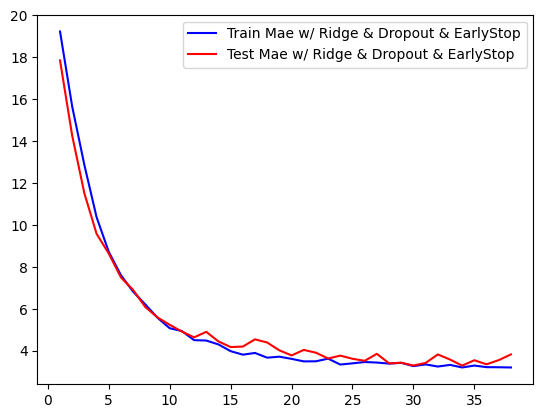

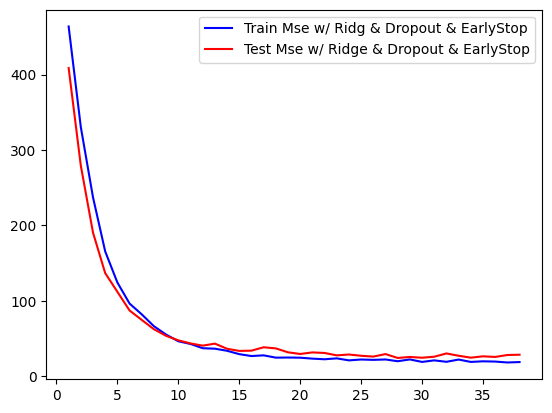

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualisation of L2 Regularization & Dropout & Early Stopping model
mae5 = history5.history['mae']
val_mae5 = history5.history['val_mae']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs = range(1,len(mae5)+1)

plt.plot(epochs , mae5,'b', label = 'Train Mae w/ Ridge & Dropout & EarlyStop')
plt.plot (epochs, val_mae5, 'r', label = 'Test Mae w/ Ridge & Dropout & EarlyStop')
plt.legend()
plt.figure()

plt.plot(epochs , loss5,'b', label = 'Train Mse w/ Ridg & Dropout & EarlyStop')
plt.plot (epochs, val_loss5, 'r', label = 'Test Mse w/ Ridge & Dropout & EarlyStop')
plt.legend()
plt.figure()

# **Comment: Early Stopping had worsen model performance and causes overfitting to re-emerge. Hence, will not be using early stopping as the performance requires longer epochs to converge and achieve better results.**

In [ ]:
#Create Model with Regularization (Ridge) with dropout +1 hidden layer
L1 = 50
L2 = 50
L3 = 50
L4 = 50

model6 = Sequential()
model6.add(Dense(L1, input_dim = 13, activation = 'relu',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l2(0.01)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model6.add(Dense(L2, activation = 'relu'))
model6.add(Dense(L3, activation = 'relu'))
model6.add(Dense(L4, activation = 'relu'))
model6.add(Dropout(rate=0.2))

#output layer
model6.add(Dense(1, activation='linear')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model6.compile(loss='mse', metrics ='mae',optimizer ='rmsprop')

#Training the model
history6 = model6.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 2s 26ms/step - loss: 534.1131 - mae: 21.1702 - val_loss: 476.8137 - val_mae: 19.6934
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 393.9796 - mae: 17.4707 - val_loss: 304.9540 - val_mae: 15.2270
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 236.1407 - mae: 13.0682 - val_loss: 155.4177 - val_mae: 10.6677
Epoch 4/200
9/9 [==============================] - 0s 10ms/step - loss: 130.6210 - mae: 9.3459 - val_loss: 82.2001 - val_mae: 7.4172
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 74.3138 - mae: 6.7767 - val_loss: 66.0135 - val_mae: 6.5304
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 66.4296 - mae: 6.2463 - val_loss: 55.7573 - val_mae: 5.8278
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 50.1758 - mae: 5.4899 - val_loss: 47.5313 - val_mae: 5.2015
Epoch 8/200
9/9 [==============================] - 0s 7ms/step - los

<Figure size 640x480 with 0 Axes>

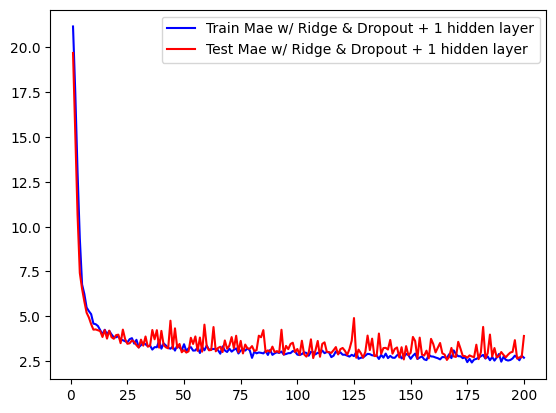

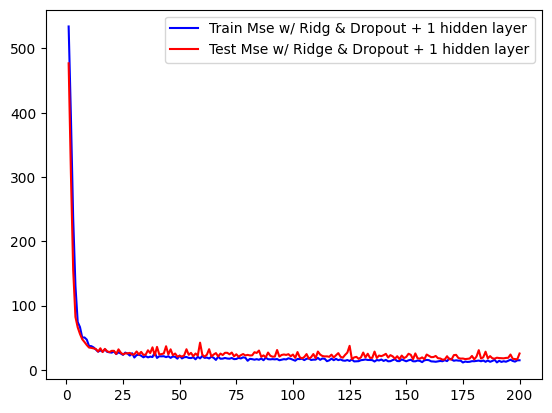

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualisation of L2 Regularization & Dropout + 1 hidden layer
mae6 = history6.history['mae']
val_mae6 = history6.history['val_mae']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

epochs = range(1,len(mae6)+1)

plt.plot(epochs , mae6,'b', label = 'Train Mae w/ Ridge & Dropout + 1 hidden layer')
plt.plot (epochs, val_mae6, 'r', label = 'Test Mae w/ Ridge & Dropout + 1 hidden layer')
plt.legend()
plt.figure()

plt.plot(epochs , loss6,'b', label = 'Train Mse w/ Ridg & Dropout + 1 hidden layer')
plt.plot (epochs, val_loss6, 'r', label = 'Test Mse w/ Ridge & Dropout + 1 hidden layer')
plt.legend()
plt.figure()

# **Comment: No significant improvement noted from adding additional hidden layer. Will retain the model architecture with only 2 hidden layers.**

# **Will perform a grid search on optimal parameters with the architecture of:**
**1. 2 hidden layers**

**2. L2 Regularization**

**3. Dropout at 20%**


In [6]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

In [8]:
#Function to create model, required for Keras Regressor
def create_model(activation = 'relu',activation2 ='linear',neuron1 = 50, neuron2 = 50,neuron3 = 50, droprate = 0.2, optimizer = 'rmsprop'):

  model = Sequential()
  model.add(Dense(neuron1, input_dim = 13, activation =activation,
                  kernel_initializer = 'he_normal',
                  kernel_regularizer = regularizers.l2(0.01)))
  model.add(Dense(neuron2, activation = activation))
  model.add(Dense(neuron3, activation = activation))
  model.add(Dropout(rate=droprate))
  model.add(Dense(1, activation = activation2))

  #Compile Model
  model.compile(loss = 'mse',
                optimizer = optimizer, metrics = 'mae')
  return model

In [9]:
#Create model
model = KerasRegressor(model=create_model,
                        verbose = 0)

#define the grid search parameters
droprate = [0.2]
neuron = [50,100]
neuron2 = [50,100]
neuron3 = [50,100]
optimizer = ['SGD','RMSprop','Adagrad','Adadelta',
             'Adam','Addamax','Nadam']
activation = ['softplus','softsign','relu',
             'tanh','linear']


param_grid = dict(model__activation= activation, model__activation2 = activation, batch_size = [100], epochs = [200],optimizer = optimizer, model__neuron1 = neuron, model__neuron2 = neuron2, model__neuron3 = neuron3, model__droprate = droprate)
grid = GridSearchCV(estimator = model,
                    param_grid=param_grid,
                    n_jobs = -1, cv=3,error_score='raise')
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


# **Pending results**

In [10]:
print("Best: %f using %s" % (grid_result.best_score_,
                             grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds,params):
  print("%f (%f) with: %r" % (mean,stdev,param))

Best: 0.877984 using {'batch_size': 100, 'epochs': 200, 'model__activation': 'softplus', 'model__activation2': 'relu', 'model__droprate': 0.2, 'model__neuron1': 100, 'model__neuron2': 50, 'model__neuron3': 100, 'optimizer': 'Nadam'}
0.856554 (0.037448) with: {'batch_size': 100, 'epochs': 200, 'model__activation': 'softplus', 'model__activation2': 'softplus', 'model__droprate': 0.2, 'model__neuron1': 50, 'model__neuron2': 50, 'model__neuron3': 50, 'optimizer': 'SGD'}
0.853597 (0.022244) with: {'batch_size': 100, 'epochs': 200, 'model__activation': 'softplus', 'model__activation2': 'softplus', 'model__droprate': 0.2, 'model__neuron1': 50, 'model__neuron2': 50, 'model__neuron3': 50, 'optimizer': 'RMSprop'}
0.857961 (0.007766) with: {'batch_size': 100, 'epochs': 200, 'model__activation': 'softplus', 'model__activation2': 'softplus', 'model__droprate': 0.2, 'model__neuron1': 50, 'model__neuron2': 50, 'model__neuron3': 50, 'optimizer': 'Adagrad'}
0.863568 (0.017525) with: {'batch_size': 100,

In [27]:
#Create Final Model
L1 = 100
L2 = 50
L3 = 100

model_f = Sequential()
model_f.add(Dense(L1, input_dim = 13, activation = 'softplus',
                kernel_initializer = 'he_normal', # He normal uses normal distribution
                kernel_regularizer = regularizers.l2(0.0001)))  #regularization can be used for all layers as well)))) #input_dim is the total of input variable
model_f.add(Dense(L2, activation = 'softplus'))
model_f.add(Dense(L3, activation = 'softplus'))
model_f.add(Dropout(rate=0.1))

#output layer
model_f.add(Dense(1, activation='relu')) #Selu or Relu also can for linear problem. Exponential is for non-linearity. 

#Compile the sequential model
model_f.compile(loss='mse', metrics ='mae',optimizer ='Nadam')

#Training the model
history_f = model_f.fit(X_train, y_train, epochs = 200, batch_size =50, validation_data = (X_test,y_test))

Epoch 1/200
9/9 [==============================] - 4s 124ms/step - loss: 519.3884 - mae: 20.7387 - val_loss: 457.1393 - val_mae: 19.2242
Epoch 2/200
9/9 [==============================] - 0s 18ms/step - loss: 357.9925 - mae: 16.3938 - val_loss: 249.7649 - val_mae: 13.4138
Epoch 3/200
9/9 [==============================] - 0s 17ms/step - loss: 174.5790 - mae: 10.2233 - val_loss: 90.2019 - val_mae: 7.0195
Epoch 4/200
9/9 [==============================] - 0s 20ms/step - loss: 81.5967 - mae: 6.5742 - val_loss: 59.2966 - val_mae: 5.8982
Epoch 5/200
9/9 [==============================] - 0s 35ms/step - loss: 60.4112 - mae: 5.8488 - val_loss: 43.5543 - val_mae: 5.0345
Epoch 6/200
9/9 [==============================] - 0s 44ms/step - loss: 48.5746 - mae: 4.7938 - val_loss: 35.8410 - val_mae: 4.6186
Epoch 7/200
9/9 [==============================] - 0s 52ms/step - loss: 41.4112 - mae: 4.5036 - val_loss: 29.7333 - val_mae: 4.3089
Epoch 8/200
9/9 [==============================] - 0s 20ms/step -

<Figure size 640x480 with 0 Axes>

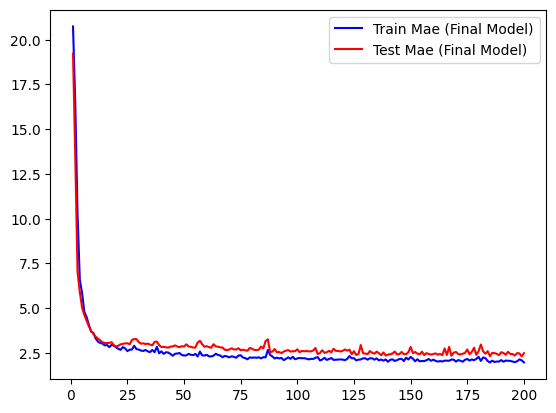

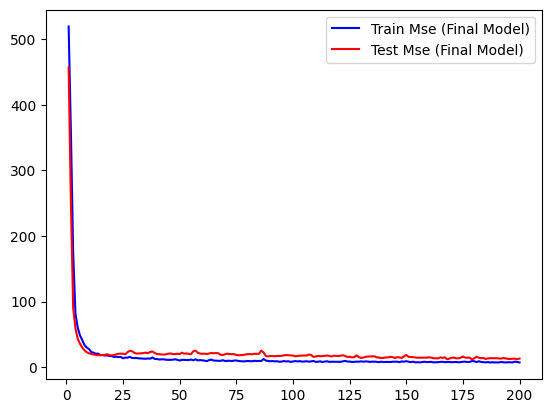

<Figure size 640x480 with 0 Axes>

In [30]:
#Visualisation of Final Model
import matplotlib.pyplot as plt

mae_f = history_f.history['mae']
val_mae_f = history_f.history['val_mae']
loss_f = history_f.history['loss']
val_loss_f = history_f.history['val_loss']

epochs = range(1,len(mae_f)+1)

plt.plot(epochs , mae_f,'b', label = 'Train Mae (Final Model)')
plt.plot (epochs, val_mae_f, 'r', label = 'Test Mae (Final Model)')
plt.legend()
plt.figure()

plt.plot(epochs , loss_f,'b', label = 'Train Mse (Final Model)')
plt.plot (epochs, val_loss_f, 'r', label = 'Test Mse (Final Model)')
plt.legend()
plt.figure()

# **Significant improvement noted. Drop rate reduced to 10% yields better results with 0.001 value for L2.**